##### Imports

In [ ]:
import warnings
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read in Data

Data is found at: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success. To read in the dataset below, please download the data and add it to the runtime files or your google drive. Please update google drive and filename when reading in the datafile.

In [ ]:
#update google drive path as needed
d = pd.read_csv('/content/drive/MyDrive/DS207/data/final project/dataset.csv')
#update filename as needed
# d = pd.read_csv('dataset.csv')
d.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Data Cleaning

In [ ]:
# Correct column names
d.rename(columns = {'Nacionality':'Nationality', 'Target': 'Student Status'}, inplace = True)

# Copy data set
df = d.copy()

# Change student status column to numeric in original data set
d['Student Status'] = d['Student Status'].map({'Dropout' : 0, 'Enrolled': 1, 'Graduate': 2})

# Get all categorical variables except Student status
cat_cols = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
          'Previous qualification', 'Nationality', "Mother's qualification", "Father's qualification",
          "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor',
          'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

# Get all continuous variables.
cont_cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
             'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
             'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
             'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
             'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
             'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
             'Unemployment rate', 'Inflation rate', 'GDP']

# Change categorical columns to category datatype.
df[cat_cols] = df[cat_cols].astype('category')

print(df.describe())
print("-"*230)
df.describe(include=['category', 'O'])

# Replace 0 and 1 values with Female and Male respectively.
df = df.replace({'Gender': {0: 'Female', 1: 'Male'}})

# Replace numerical values with their verbal analogs.
df[['Nationality']] = df[['Nationality']].replace({'Nationality': {1: 'Portuguese', 2: 'German', 3: 'Spanish',
                                                               4: 'Italian', 5: 'Dutch', 6: 'English',
                                                               7: 'Lithuanian', 8: 'Angolan', 9: 'Cape Verdean',
                                                               10: 'Guinean', 11: 'Mozambican', 12: 'Santomean',
                                                               13: 'Turkish', 14: 'Brazilian', 15: 'Romanian',
                                                               16: 'Moldovan', 17: 'Mexican', 18: 'Ukrainian',
                                                               19: 'Russian', 20: 'Cuban', 21: 'Colombian'}})


# Find the optimal number of bins using Sturges’ rule.
bins = int(math.ceil(math.log2(len(df))) + 1)
age_min = df['Age at enrollment'].min()
age_max = df['Age at enrollment'].max()
bin_int = df['Age at enrollment'].max() // bins
bin_edges = [i for i in range(age_min, age_max + bin_int, bin_int)]

# Perform binning on Age at enrollment column.
age_labels = [f'{bin_edges[i]}-{bin_edges[i + 1]}' for i in range(len(bin_edges) - 1)]
df['Age at enrollment bins'] = pd.cut(df['Age at enrollment'], bin_edges, labels=age_labels)

# Replace 1 - Single, 2 - Married, 3 - Widower, 4 - Divorced, 5 - Facto union, and 6 - Legally separated.
df = df.replace({'Marital status': {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
                                    5: 'Facto union', 6: 'Legally separated'}})

# Replace 0 and 1 values with Evening and daytime respectively.
df = df.replace({'Daytime/evening attendance': {0: 'Evening', 1: 'Daytime'}})

df[['Course']] = df[['Course']].replace({'Course': {1: 'Biofuel Production Technologies', 2: 'Animation and Multimedia Design',
                                                    3: 'Social Service (evening attendance)', 4: 'Agronomy',
                                                    5: 'Communication Design', 6: 'Veterinary Design',
                                                    7: 'Informatics Engineering', 8: 'Equiniculture', 9: 'Management',
                                                    10: 'Social Service', 11: 'Tourism', 12: 'Nursing', 13: 'Oral Hygiene',
                                                    14: 'Advertising and Marketing Management',
                                                    15: 'Journalism and Communication', 16: 'Basic Education',
                                                    17: 'Management (evening attendance)'}})

       Age at enrollment  Curricular units 1st sem (credited)  \
count        4424.000000                          4424.000000   
mean           23.265145                             0.709991   
std             7.587816                             2.360507   
min            17.000000                             0.000000   
25%            19.000000                             0.000000   
50%            20.000000                             0.000000   
75%            25.000000                             0.000000   
max            70.000000                            20.000000   

       Curricular units 1st sem (enrolled)  \
count                          4424.000000   
mean                              6.270570   
std                               2.480178   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              26.000000   


### EDA

* Using 'df' for visualizations (has the actual labels for values in column rather than the numbers), using 'd' for other analysis (has the variables as numeric e.g. Student Success changed to 0, 1, 2)

In [ ]:
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Adjust some seaborn settings.
colors = sns.color_palette('muted')
sns.set_palette('muted')
sns.set_style('ticks')
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8'})

# Assign each categorical variable its own color.
colors_gender = {'Female': colors[0], 'Male': colors[1]}
colors_attendance = {'Evening': colors[0], 'Daytime': colors[1]}
colors_binary = {'Yes': colors[0], 'No': colors[1]}
colors_target = {'Graduate': colors[-1], 'Dropout': colors[-2], 'Enrolled': colors[4]}

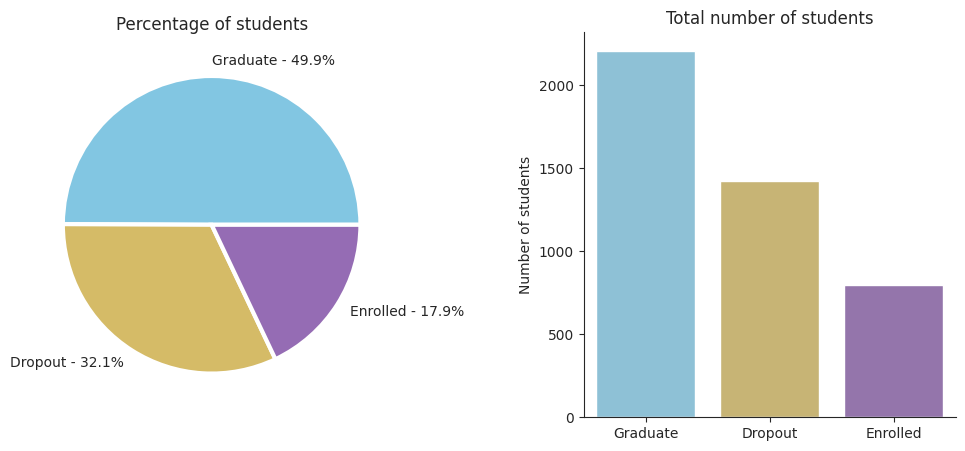

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = df['Student Status'].value_counts()

# Create a pie chart.
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'},
        colors=[colors_target.get(i) for i in data.index])
ax1.set_title('Percentage of students')

# Create a bar plot.
ax2 = sns.barplot(data=data.to_frame(), y='count', x=data.index, palette=colors_target)
ax2.set(xlabel=None, ylabel='Number of students')
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Total number of students')

plt.show()

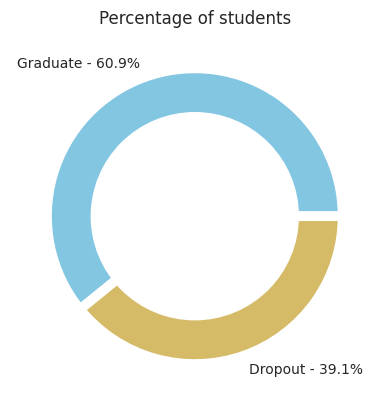

In [ ]:
# Exclude currently enrolled students.
data = df[df['Student Status'] != 'Enrolled']['Student Status'].value_counts()

# Create a pie chart.
circle = plt.Circle((0,0), 0.7, color='white')
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
plt.pie(data, labels=labels, wedgeprops = {'linewidth' : 7, 'edgecolor' : 'white'},
colors=[colors_target.get(i) for i in data.index])
plt.title('Percentage of students')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

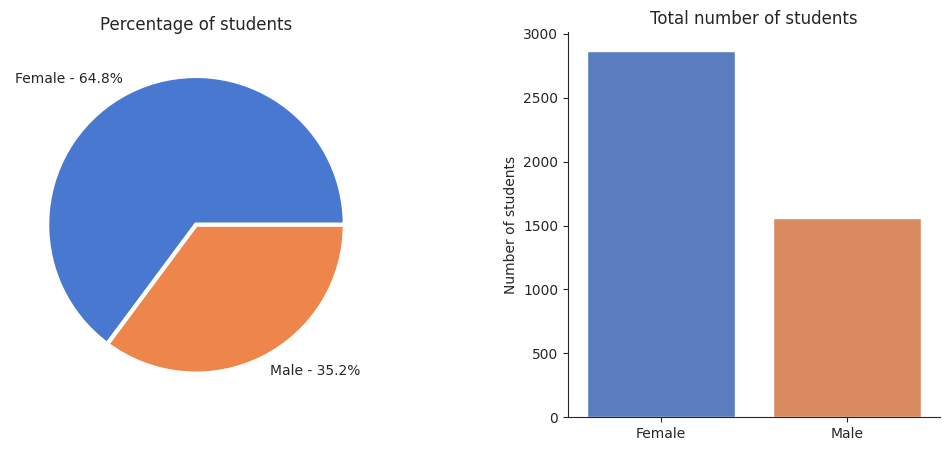

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = df['Gender'].value_counts()

# Create a pie chart.
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'},
        colors=[colors_gender.get(i) for i in data.index])
ax1.set_title('Percentage of students')

# Create a bar plot.
ax2 = sns.barplot(data=data.to_frame(), y='count', x=data.index, palette=colors_gender)
ax2.set(xlabel=None, ylabel='Number of students')
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Total number of students')

plt.show()

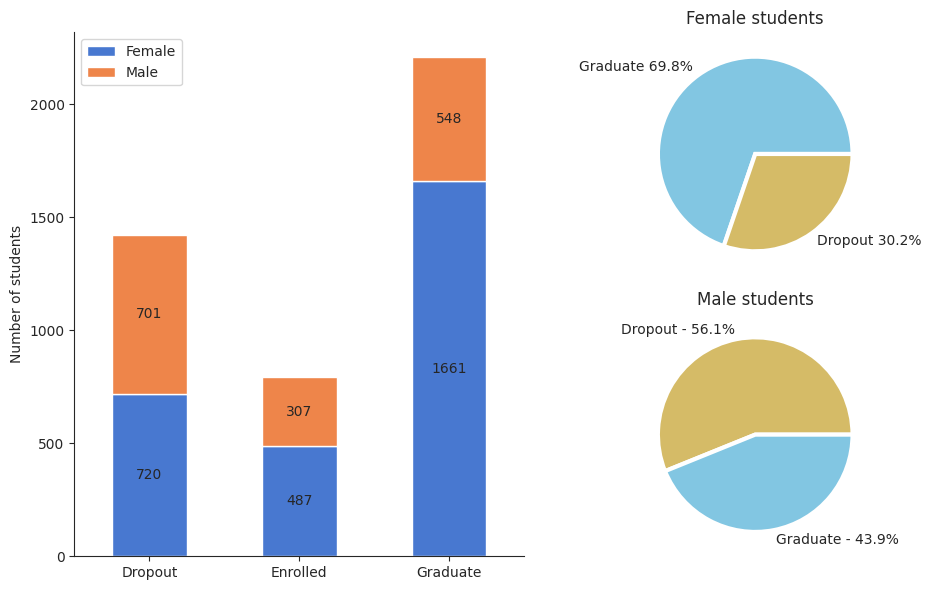

In [ ]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=2)

# Create a stacked barchart.
ax1 = fig.add_subplot(gs[:, 0])
data = df.groupby(['Gender', 'Student Status']).size().reset_index().pivot(columns='Gender', index='Student Status', values=0)
data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_gender.get(i) for i in data.columns])
for cont in ax1.containers:
    ax1.bar_label(cont, label_type='center')
ax1.spines[['right', 'top']].set_visible(False)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.legend_.set_title(None)
plt.xticks(rotation=0)

# Create a pie chart for female students.
females = df[(df['Gender'] == 'Female') & (df['Student Status'] != 'Enrolled')]['Student Status'].value_counts()
labels = [f'{label} {np.round(females[label] / females.sum() * 100, 1)}%' for label in females.index]
ax2 = fig.add_subplot(gs[0, 1])
patches, texts = ax2.pie(females, labels=labels, colors=[colors_target.get(i) for i in females.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax2.set(title='Female students')

# Create a pie chart for male students.
males = df[(df['Gender'] == 'Male') & (df['Student Status'] != 'Enrolled')]['Student Status'].value_counts()
labels = [f'{label} - {np.round(males[label] / males.sum() * 100, 1)}%' for label in males.index]
ax3 = fig.add_subplot(gs[1, 1])
ax3.pie(males, labels=labels, colors=[colors_target.get(i) for i in males.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax3.set(title='Male students')

plt.show()

[Text(0, 0.5, 'Number of students')]

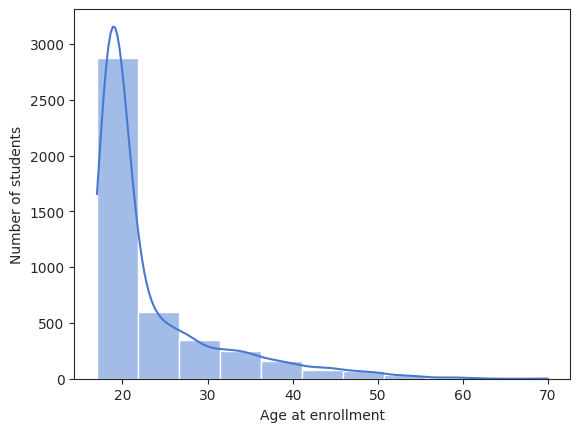

In [ ]:
# Create a histogram.
labels = df['Age at enrollment'].value_counts()
labels = [f'{label} - {round(males[label] / males.sum() * 100)}%' for label in males.index]
ax2 = sns.histplot(data=df, x='Age at enrollment', bins=bins, binwidth=bin_int, kde=True)
ax2.set(ylabel='Number of students')

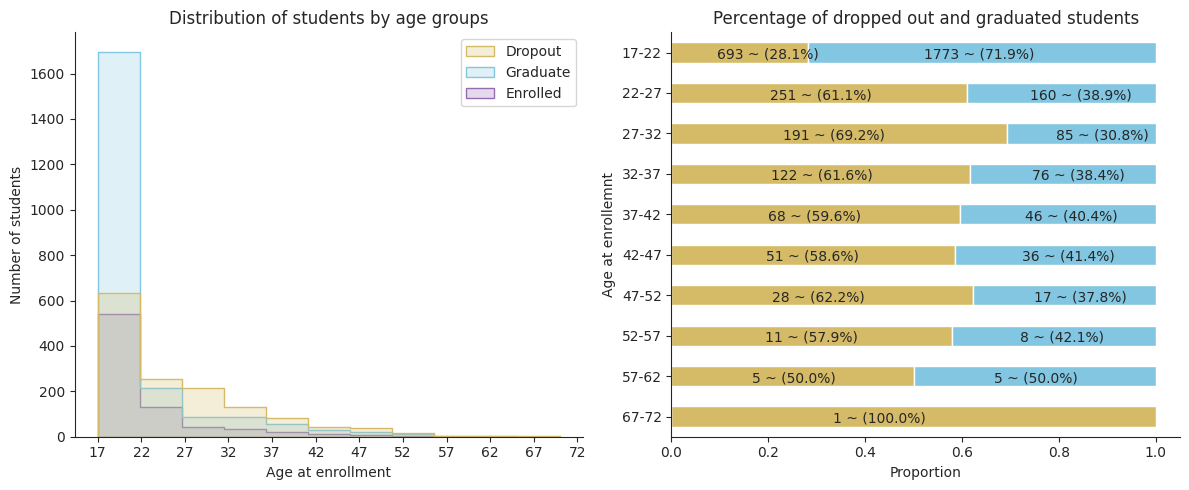

In [ ]:
fig = plt.figure(figsize=(12, 5), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

# Create a histogram.
ax1 = fig.add_subplot(gs[0, 0])
ax1 = sns.histplot(data=df, x='Age at enrollment', hue='Student Status', element='step', bins=bins,
                  binwidth=bin_int, palette=colors_target)
ax1.set(ylabel='Number of students')
ax1.legend_.set_title(None)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Distribution of students by age groups')
plt.xticks([i for i in range(age_min, age_max + bin_int, bin_int)])

# Create a stacked bar plot.
ax2 = fig.add_subplot(gs[0, 1])
data = pd.crosstab(index=df['Age at enrollment bins'], columns=df[df['Student Status'] != 'Enrolled']['Student Status'])
data_prop = pd.crosstab(index=df['Age at enrollment bins'], columns=df[df['Student Status'] != 'Enrolled']['Student Status'], normalize='index')
labels = [i for i in age_labels if i in data.index]
data_prop.loc[labels[::-1]].plot(ax=ax2, kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proportion', ylabel='Age at enrollemnt')
ax2.get_legend().remove()
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[labels[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        if proportion:
            plt.text(x=(y_loc - proportion) + (proportion / 3), y=n - 0.15, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

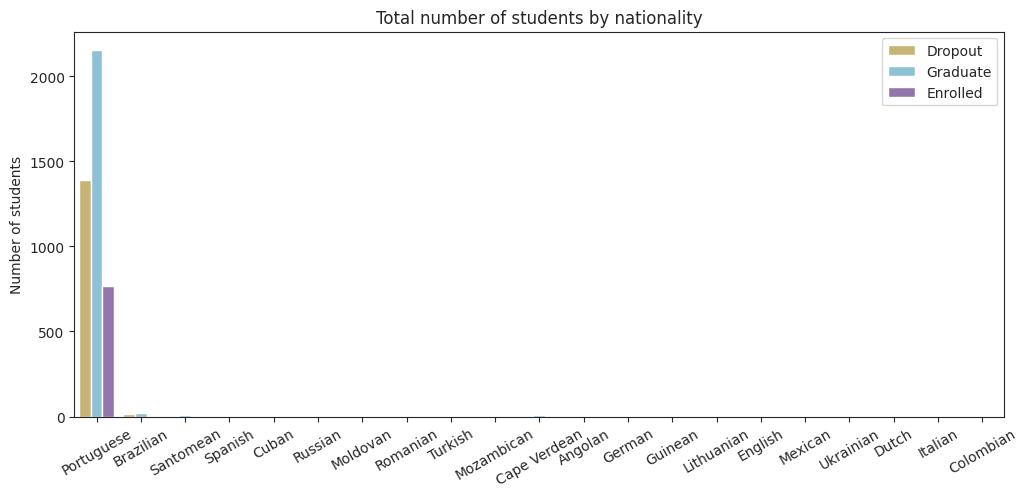

In [ ]:
# Create a count plot.
fig, ax = plt.subplots(figsize=(12, 5))
order = df[df['Student Status'] == 'Enrolled']['Nationality'].value_counts()
ax = sns.countplot(data=df, x='Nationality', hue='Student Status', palette=colors_target, order=order.index)
ax.set(xlabel=None, ylabel='Number of students', title='Total number of students by nationality')
plt.xticks(rotation=30)
ax.legend_.set_title(None)
plt.show()

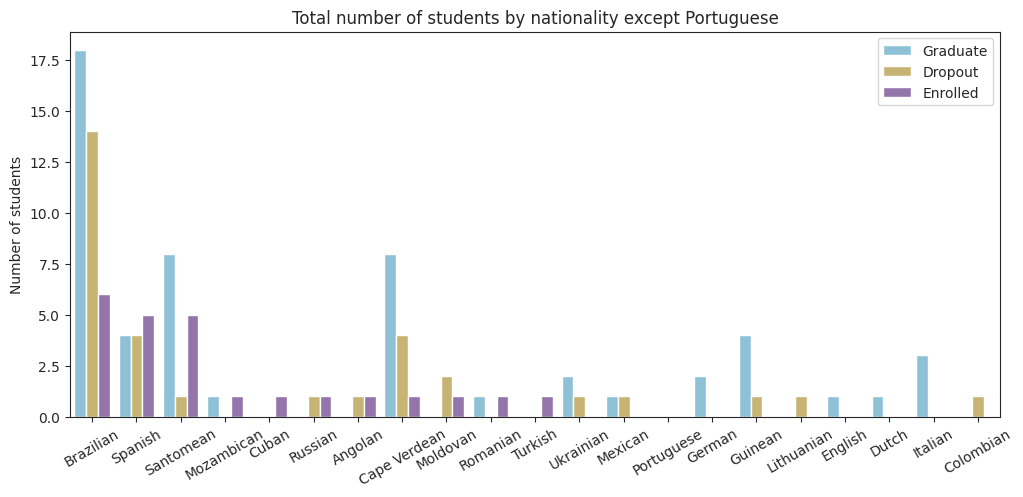

In [ ]:
# Create a count plot wothout Portuguese students.
fig, ax = plt.subplots(figsize=(12, 5))
data = df[df['Nationality'] != 'Portuguese']
order = data[data['Student Status'] == 'Enrolled']['Nationality'].value_counts()
ax = sns.countplot(data=data, x='Nationality', hue='Student Status', palette=colors_target, order=order.index)
ax.set(xlabel=None, ylabel='Number of students', title='Total number of students by nationality except Portuguese')
plt.xticks(rotation=30)
ax.legend_.set_title(None)
plt.show()

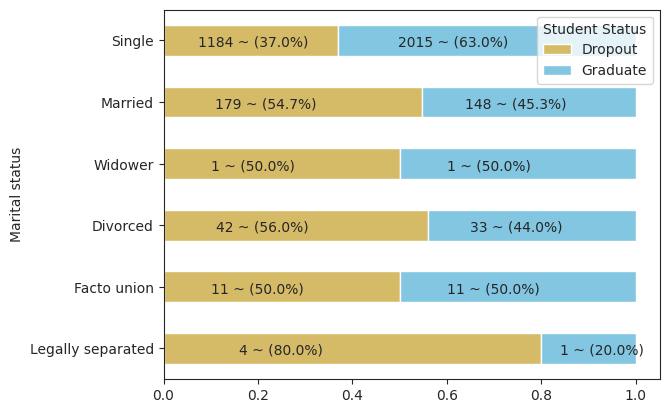

In [ ]:
order = ['Single', 'Married', 'Widower', 'Divorced', 'Facto union', 'Legally separated']

# Create a stacked bar plot.
data = pd.crosstab(index=df['Marital status'], columns=df[df['Student Status'] != 'Enrolled']['Student Status'])
data_prop = pd.crosstab(index=df['Marital status'], columns=df[df['Student Status'] != 'Enrolled']['Student Status'], normalize='index')
data_prop.loc[order[::-1]].plot( kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proportion', ylabel='Marital status')
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.1, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

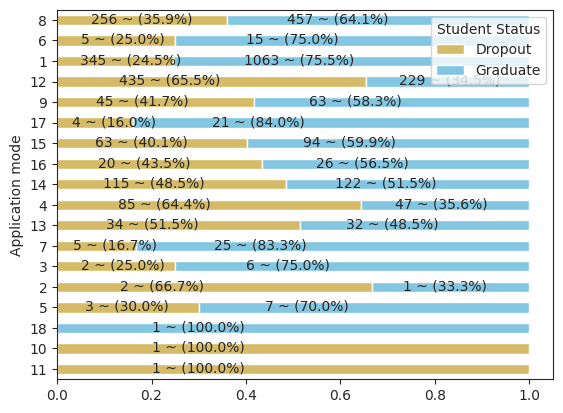

In [ ]:
# Create a stacked bar plot.
order = df['Application mode'].unique()
data = pd.crosstab(index=df['Application mode'], columns=df[df['Student Status'] != 'Enrolled']['Student Status'])
data_prop = pd.crosstab(index=df['Application mode'], columns=df[df['Student Status'] != 'Enrolled']['Student Status'], normalize='index')
data_prop.loc[order[::-1]].plot(kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proportion', ylabel='Application mode')
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        if proportion:
            plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.15, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

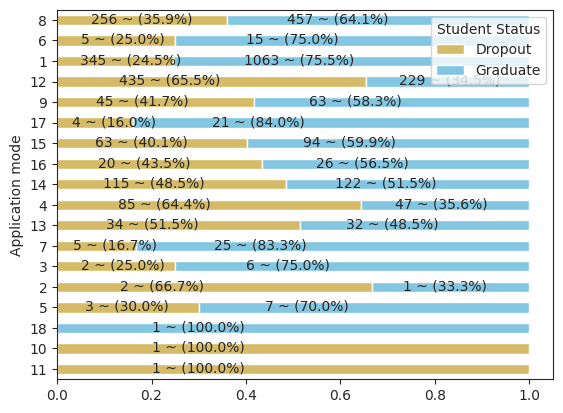

In [ ]:
# Create a stacked bar plot
order = df['Application mode'].unique()
data = pd.crosstab(index=df['Application mode'], columns=df[df['Student Status'] != 'Enrolled']['Student Status'])
data_prop = pd.crosstab(index=df['Application mode'], columns=df[df['Student Status'] != 'Enrolled']['Student Status'], normalize='index')
data_prop.loc[order[::-1]].plot(kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proportion', ylabel='Application mode')
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        if proportion:
            plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.15, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

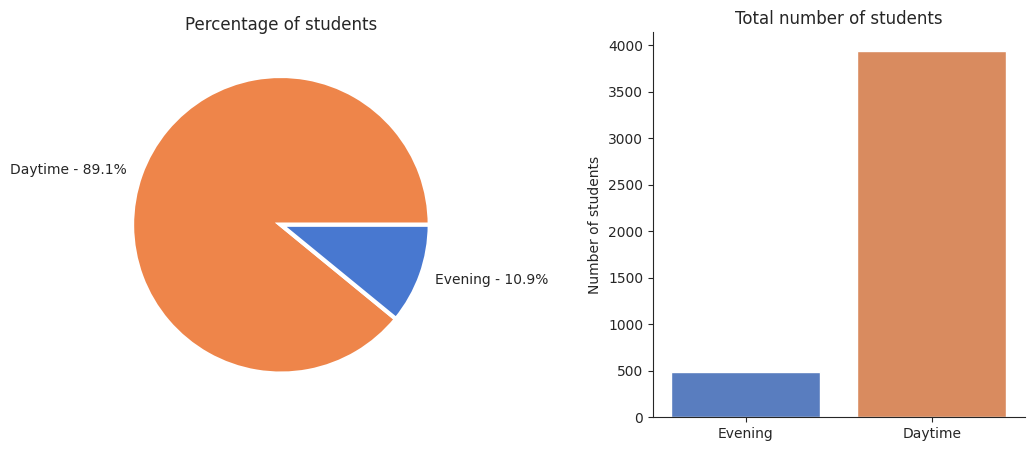

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = df['Daytime/evening attendance'].value_counts()

# Create a pie chart.
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, colors=[colors_attendance.get(i) for i in data.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax1.set_title('Percentage of students')

# Create a bar plot.
ax2 = sns.barplot(data=data.to_frame(), y='count', x=data.index, palette=colors_attendance)
ax2.set(xlabel=None, ylabel='Number of students')
ax2.set_title('Total number of students')
ax2.spines[['right', 'top']].set_visible(False)

plt.show()

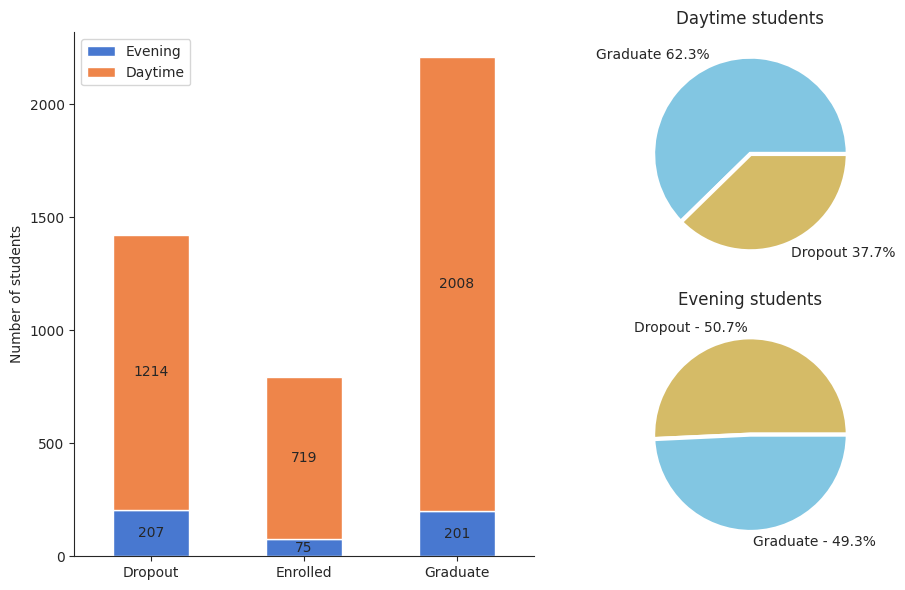

In [ ]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=2)

# Create a stacked barchart.
ax1 = fig.add_subplot(gs[:, 0])
data = df.groupby(['Daytime/evening attendance',
                   'Student Status']).size().reset_index().pivot(columns='Daytime/evening attendance', index='Student Status', values=0)
data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_attendance.get(i) for i in data.columns])
for cont in ax1.containers:
    ax1.bar_label(cont, label_type='center')
ax1.spines[['right', 'top']].set_visible(False)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.legend_.set_title(None)
plt.xticks(rotation=0)

# Create a pie chart for daytime students.
daytime = df[(df['Daytime/evening attendance'] == 'Daytime') & (df['Student Status'] != 'Enrolled')]['Student Status'].value_counts()
labels = [f'{label} {np.round(daytime[label] / daytime.sum() * 100, 1)}%' for label in daytime.index]
ax2 = fig.add_subplot(gs[0, 1])
patches, texts = ax2.pie(daytime, labels=labels, colors=[colors_target.get(i) for i in daytime.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax2.set(title='Daytime students')

# Create a pie chart for evening students.
evening = df[(df['Daytime/evening attendance'] == 'Evening') & (df['Student Status'] != 'Enrolled')]['Student Status'].value_counts()
labels = [f'{label} - {np.round(evening[label] / evening.sum() * 100, 1)}%' for label in evening.index]
ax3 = fig.add_subplot(gs[1, 1])
ax3.pie(evening, labels=labels, colors=[colors_target.get(i) for i in evening.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax3.set(title='Evening students')

plt.show()

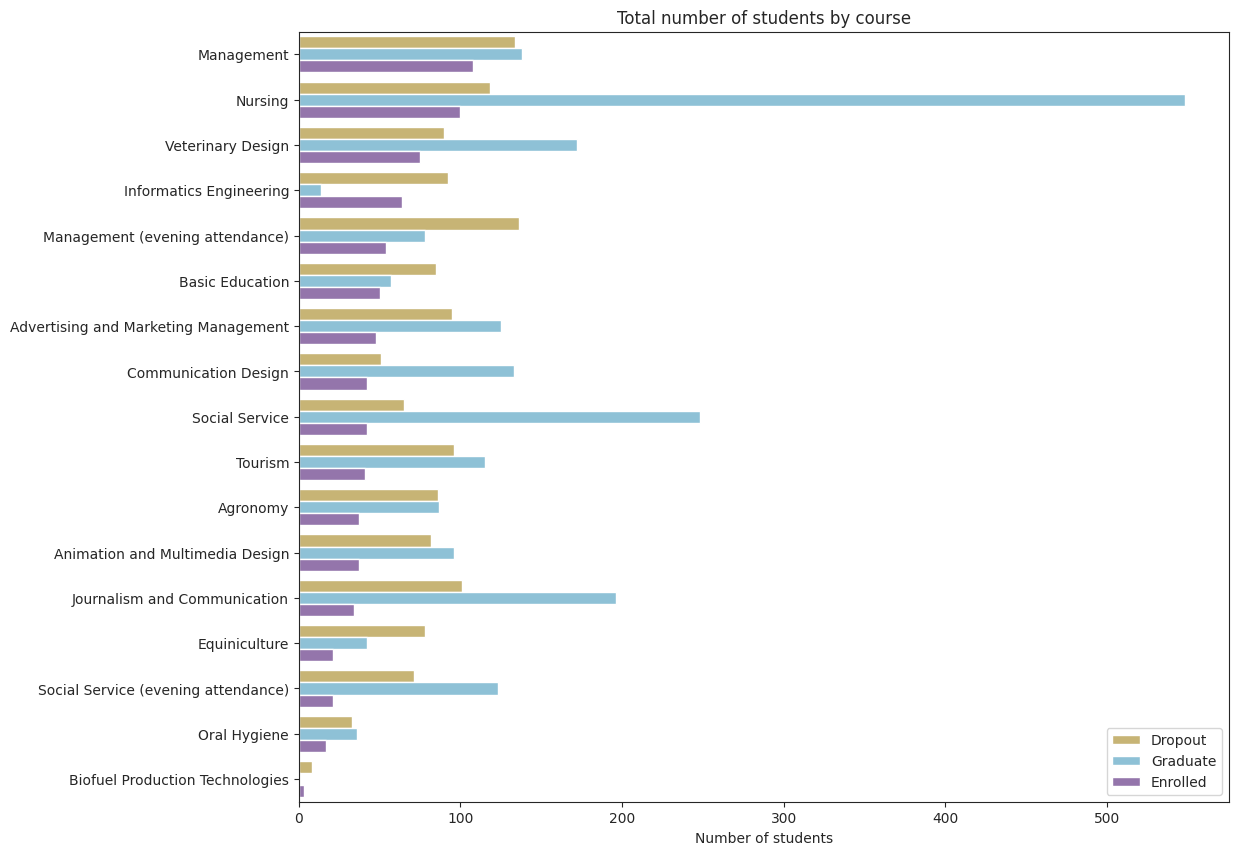

In [ ]:
# Create a count plot.
fig, ax = plt.subplots(figsize=(12, 10))
order = df[df['Student Status'] == 'Enrolled']['Course'].value_counts().index
ax = sns.countplot(data=df, y='Course', hue='Student Status', palette=colors_target, order=order)
ax.set(xlabel='Number of students', ylabel=None, title='Total number of students by course')
ax.legend_.set_title(None)
plt.show()

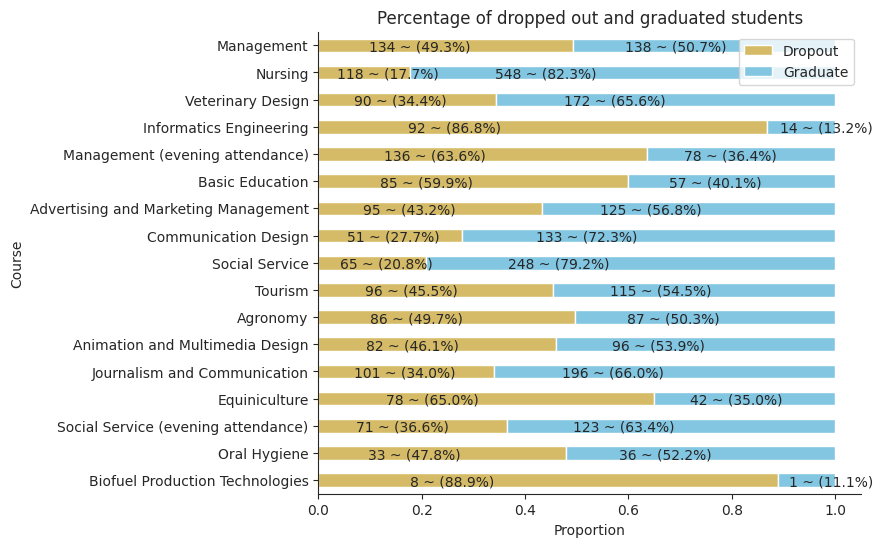

In [ ]:
# Create a stacked bar plot.
data = pd.crosstab(index=df['Course'], columns=df[df['Student Status'] != 'Enrolled']['Student Status'])
data_prop = pd.crosstab(index=df['Course'], columns=df[df['Student Status'] != 'Enrolled']['Student Status'], normalize='index')
ax = data_prop.loc[order[::-1]].plot(kind='barh', stacked=True,
                                     color=[colors_target.get(i) for i in data.columns], figsize=(7, 6))
ax.set(xlabel='Proportion', ylabel='Course')
ax.spines[['right', 'top']].set_visible(False)
ax.legend_.set_title(None)
ax.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.2, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

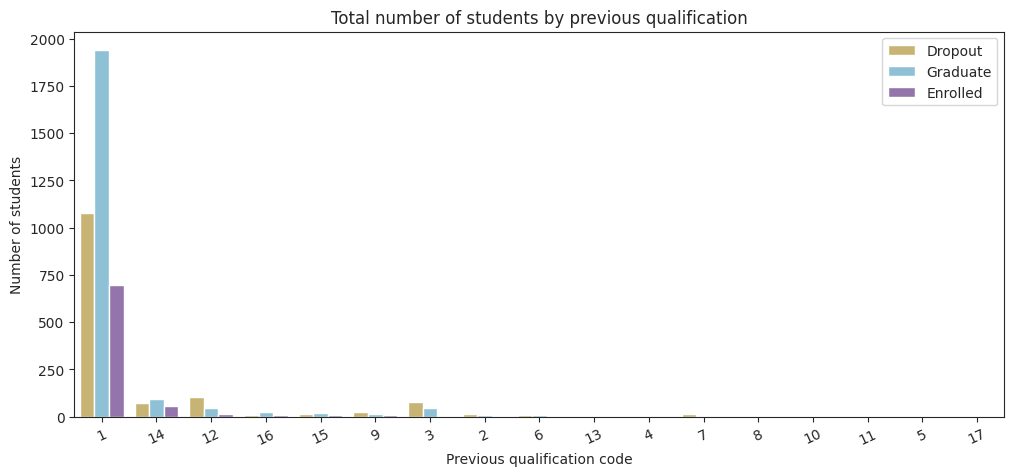

In [ ]:
# Create a count plot.
fig, ax = plt.subplots(figsize=(12, 5))
order = df[df['Student Status'] == 'Enrolled']['Previous qualification'].value_counts()
ax = sns.countplot(data=df, x='Previous qualification', hue='Student Status', palette=colors_target, order=order.index)
ax.set(xlabel='Previous qualification code', ylabel='Number of students',
       title='Total number of students by previous qualification')
plt.xticks(rotation=25)
ax.legend_.set_title(None)
plt.show()

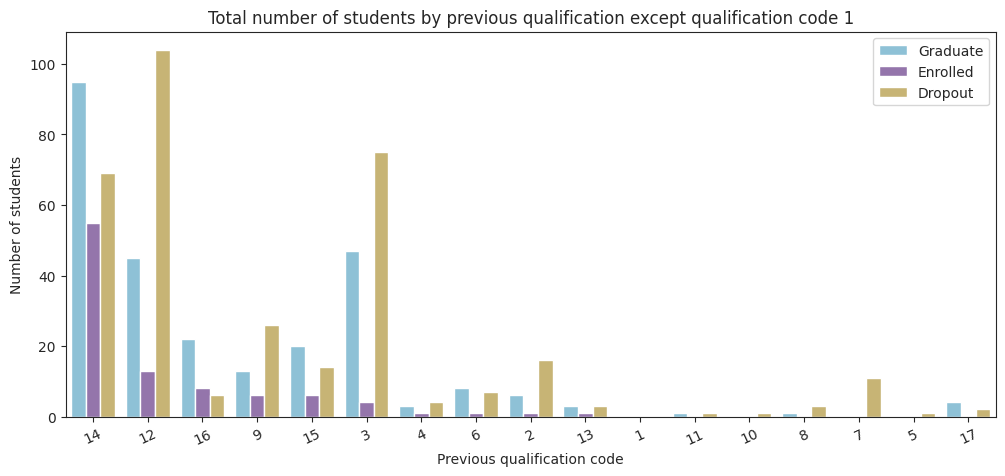

In [ ]:
# Create a count plot wothout students with secondary education (1) as previous qualification.
fig, ax = plt.subplots(figsize=(12, 5))
data = df[df['Previous qualification'] != 1]
order = data[data['Student Status'] == 'Enrolled']['Previous qualification'].value_counts()
ax = sns.countplot(data=data, x='Previous qualification', hue='Student Status', palette=colors_target, order=order.index)
ax.set(xlabel='Previous qualification code', ylabel='Number of students',
       title='Total number of students by previous qualification except qualification code 1')
plt.xticks(rotation=25)
ax.legend_.set_title(None)
plt.show()

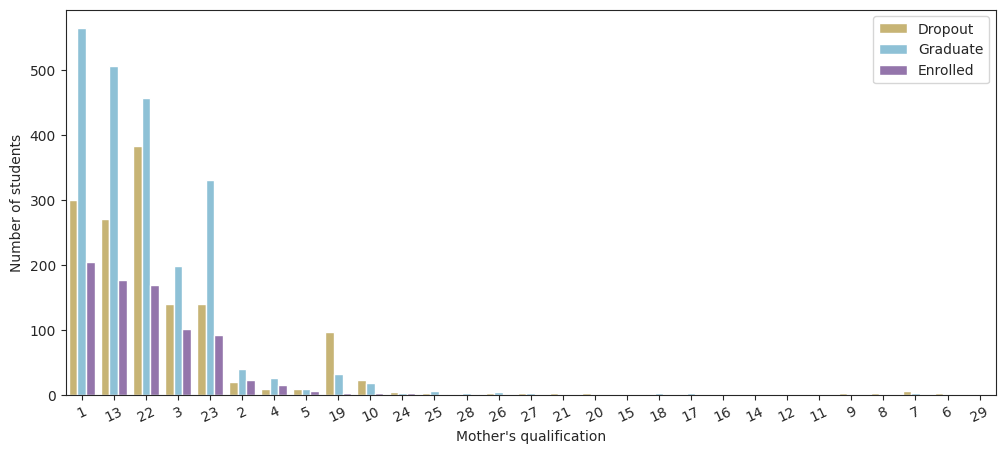

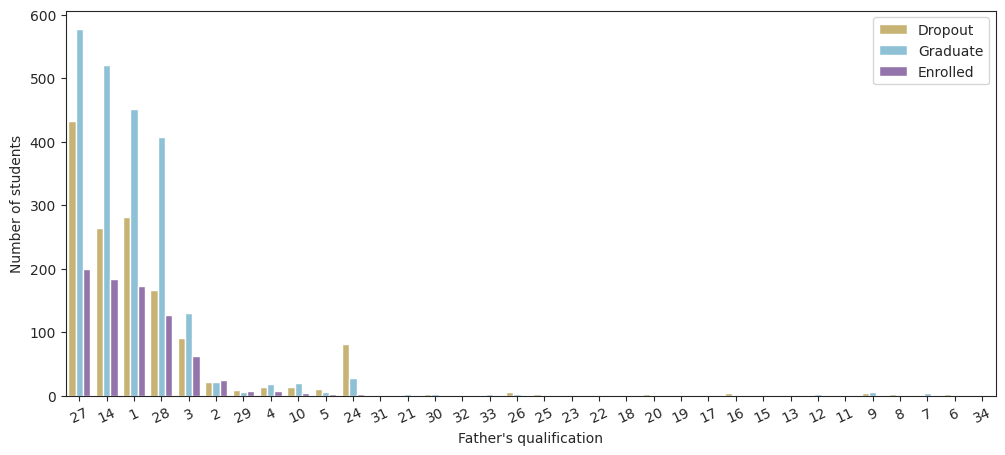

In [ ]:
cols = ["Mother's qualification", "Father's qualification"]

# Create count plots.
for col in cols:
    fig, ax = plt.subplots(figsize=(12, 5))
    order = df[df['Student Status'] == 'Enrolled'][col].value_counts()
    ax = sns.countplot(data=df, x=col, hue='Student Status', palette=colors_target, order=order.index)
    ax.set(xlabel=col, ylabel='Number of students')
    plt.xticks(rotation=25)
    ax.legend_.set_title(None)
    plt.show()

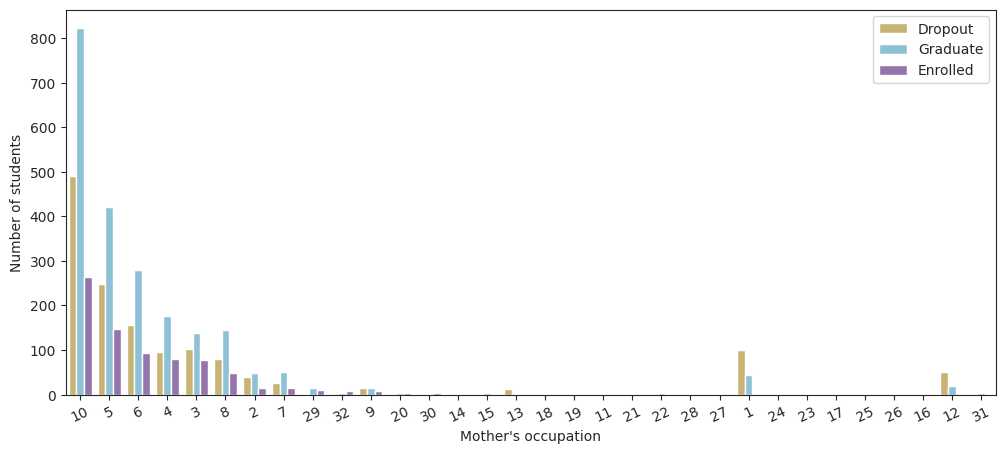

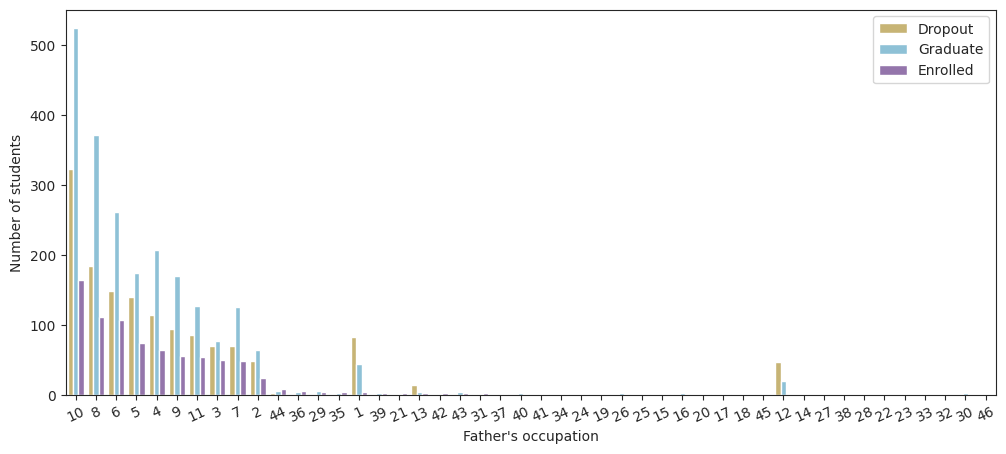

In [ ]:
cols = ["Mother's occupation", "Father's occupation"]

# Create count plots.
for col in cols:
    fig, ax = plt.subplots(figsize=(12, 5))
    order = df[df['Student Status'] == 'Enrolled'][col].value_counts()
    ax = sns.countplot(data=df, x=col, hue='Student Status', palette=colors_target, order=order.index)
    ax.set(xlabel=col, ylabel='Number of students')
    plt.xticks(rotation=25)
    ax.legend_.set_title(None)
    plt.show()

In [ ]:
cols = ['Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'International']
# Replace 0 and 1 values with No and Yes respectively.
for col in cols:
    df = df.replace({col: {0: 'No', 1: 'Yes'}})

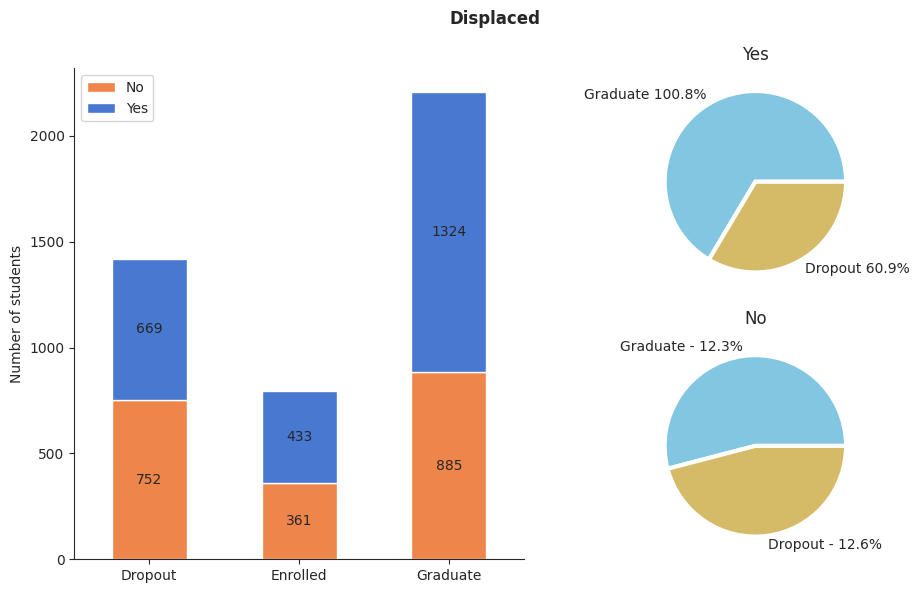

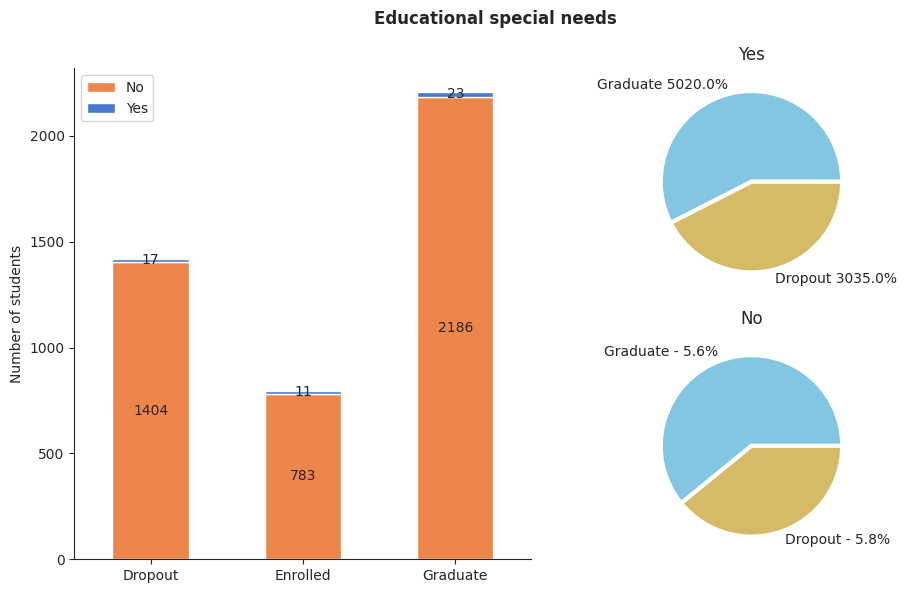

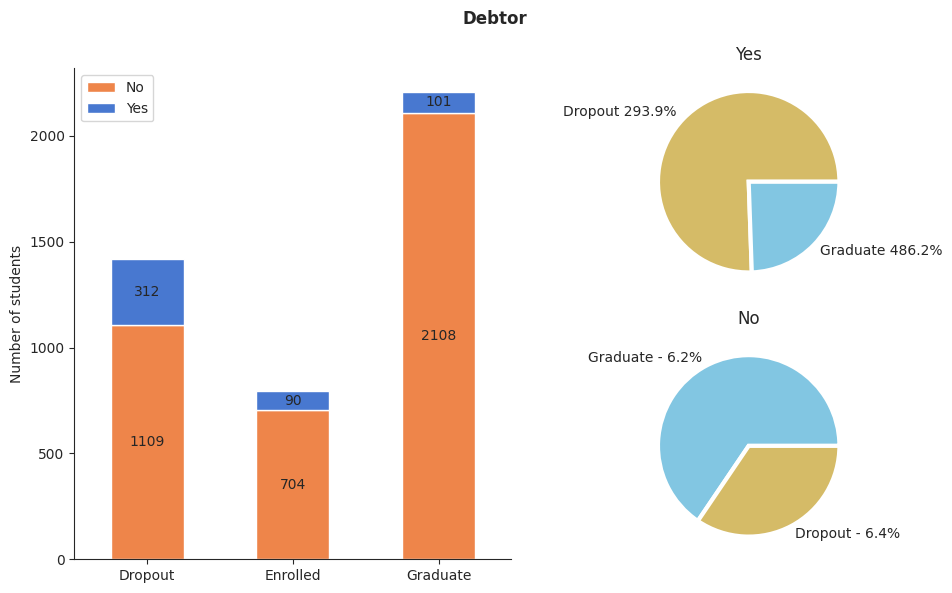

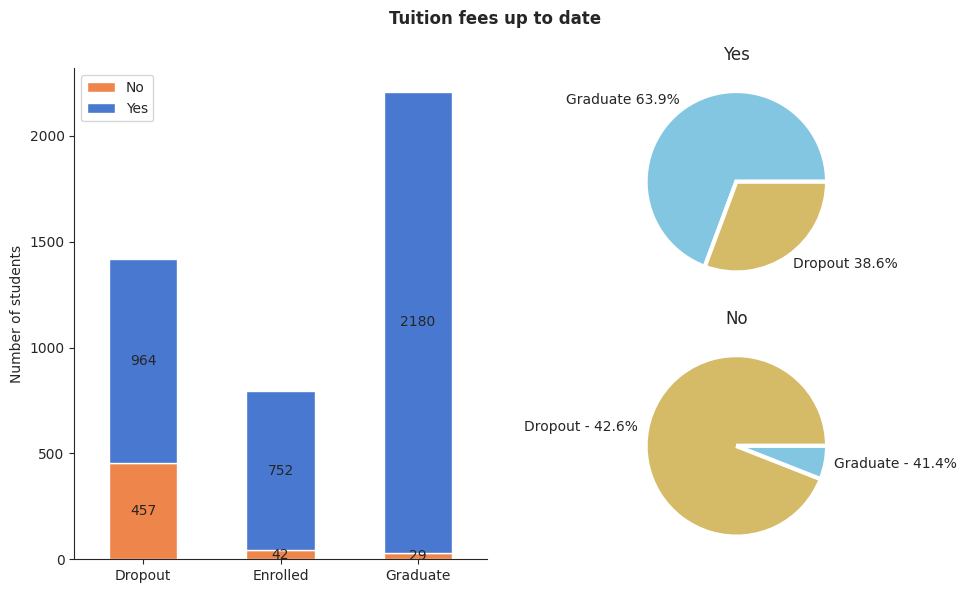

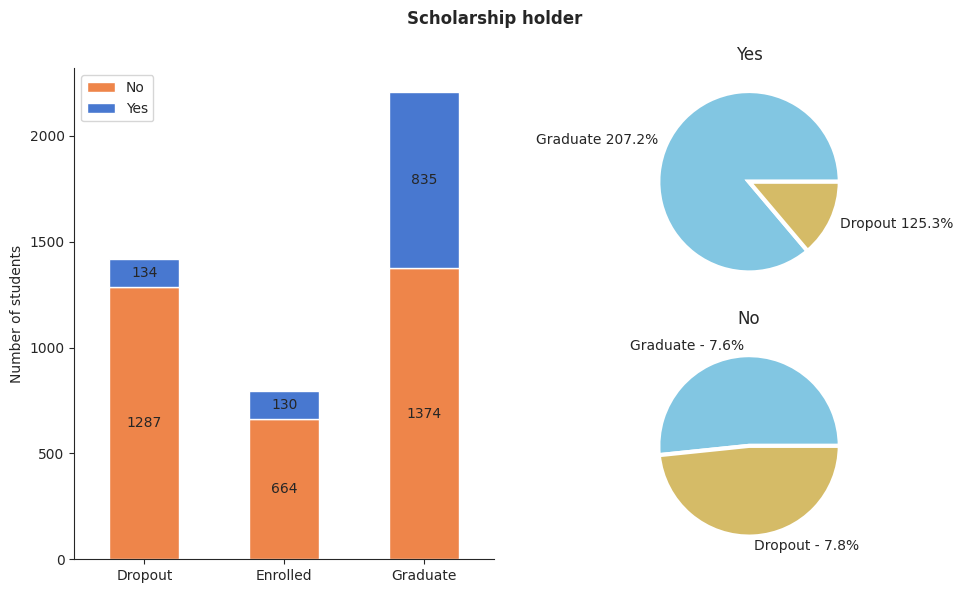

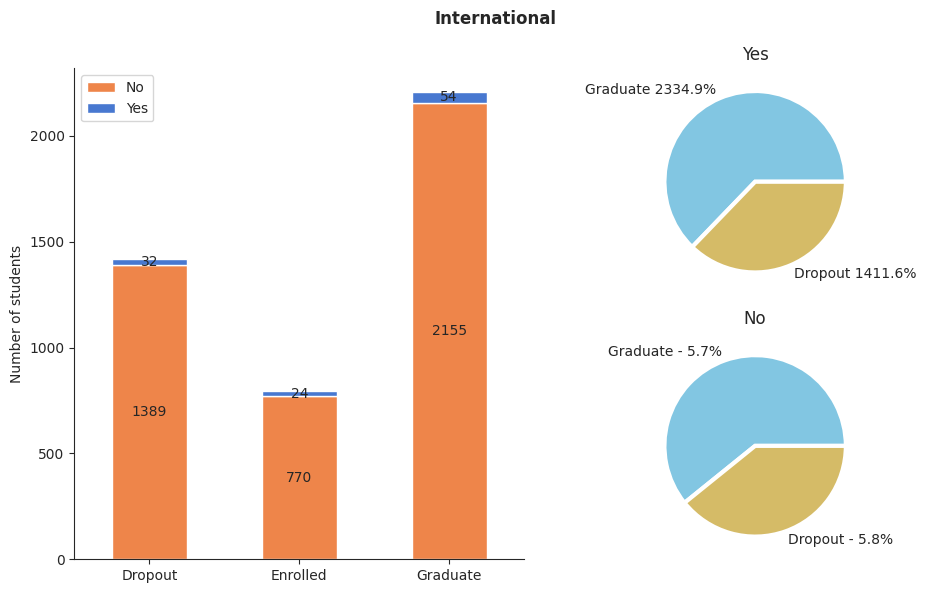

In [ ]:
for col in cols:
    fig = plt.figure(figsize=(10, 6), tight_layout=True)
    gs = fig.add_gridspec(nrows=2, ncols=2)

    # Create a stacked barchart.
    ax1 = fig.add_subplot(gs[:, 0])
    data = df.groupby([col, 'Student Status']).size().reset_index().pivot(columns=col,
                                                                  index='Student Status', values=0)
    data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_binary.get(i) for i in data.columns])
    for cont in ax1.containers:
        ax1.bar_label(cont, label_type='center')
    ax1.spines[['right', 'top']].set_visible(False)
    ax1.set(xlabel=None, ylabel='Number of students')
    ax1.legend_.set_title(None)
    plt.xticks(rotation=0)

    # Create a pie chart with parameter Yes.
    yes = df[(df[col] == 'Yes') & (df['Student Status'] != 'Enrolled')]['Student Status'].value_counts()
    labels = [f'{label} {np.round(daytime[label] / yes.sum() * 100, 1)}%' for label in yes.index]
    ax2 = fig.add_subplot(gs[0, 1])
    patches, texts = ax2.pie(yes, labels=labels, colors=[colors_target.get(i) for i in yes.index],
            wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
    ax2.set(title='Yes')

    # Create a pie chart with parameter No.
    no = df[(df[col] == 'No') & (df['Student Status'] != 'Enrolled')]['Student Status'].value_counts()
    labels = [f'{label} - {np.round(evening[label] / no.sum() * 100, 1)}%' for label in no.index]
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.pie(no, labels=labels, colors=[colors_target.get(i) for i in no.index],
            wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
    ax3.set(title='No')

    fig.suptitle(col, weight='bold')

    plt.show()

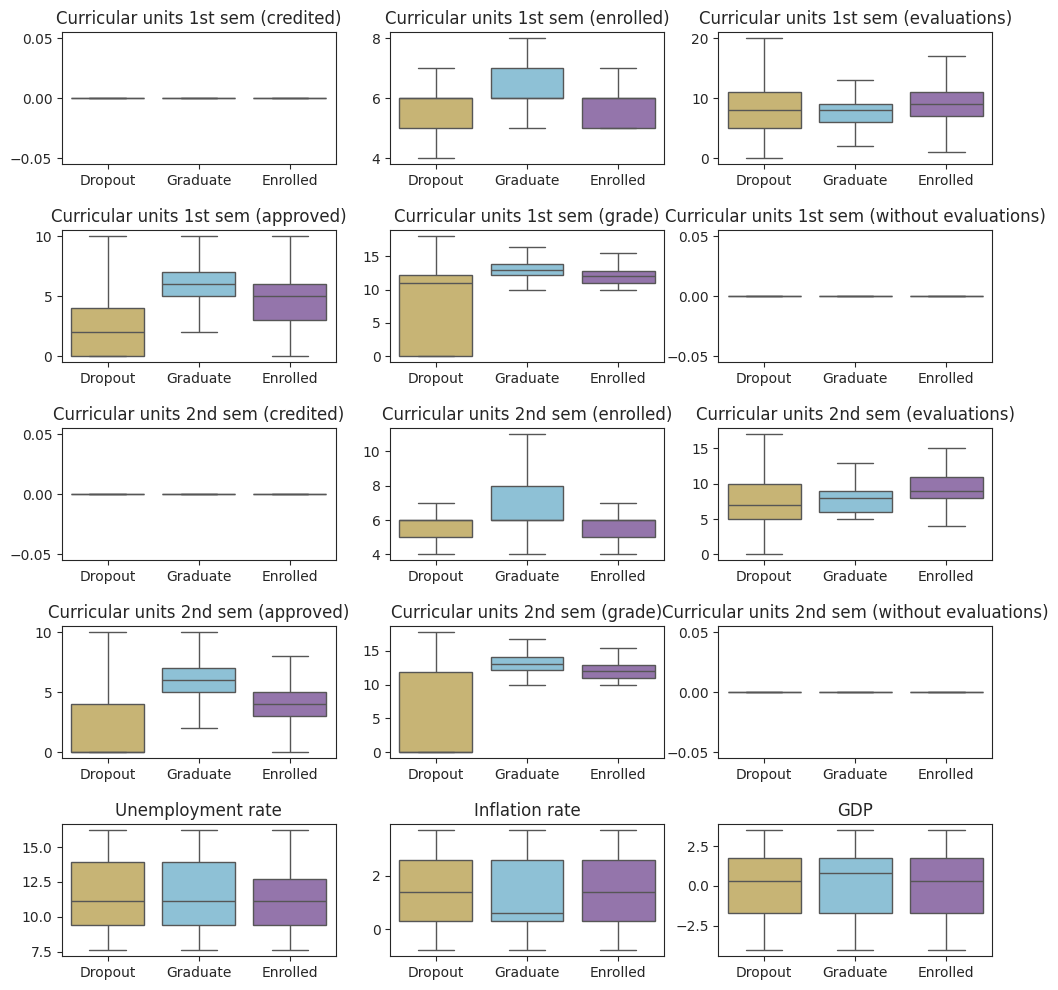

In [ ]:
fig, axs = plt.subplots(5, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
cols = ['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']

index = 0

for i in range(5):
    for j in range(3):
        sns.boxplot(df, x='Student Status', y=cols[index], showfliers=False, palette=colors_target, ax=axs[i, j])
        axs[i, j].set(xlabel=None, ylabel=None, title=cols[index])
        index += 1

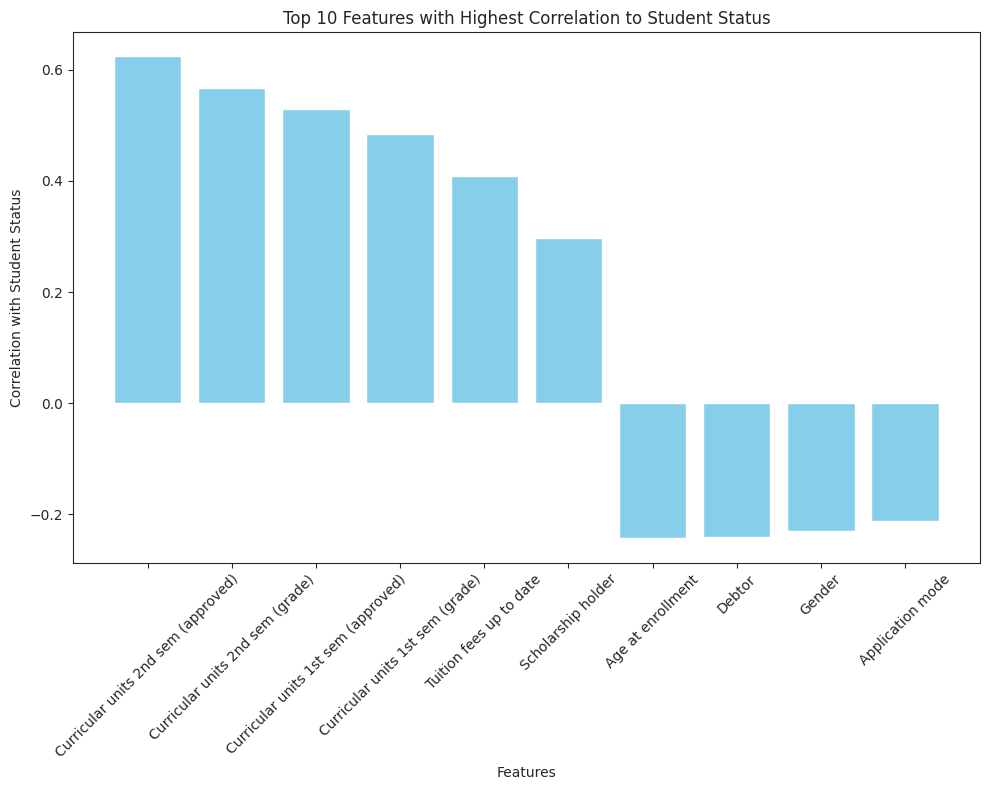

In [ ]:
# Encode 'Student Status' column
d['Student Status'] = d['Student Status'].replace({'Dropout': 0, 'Graduate': 1})

# Recalculating correlations to ensure consistency
correlations = d.corr()['Student Status'].drop('Student Status')
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features].values

# Plotting the top 10 features
plt.figure(figsize=(10, 8))
plt.bar(x=top_10_features, height=top_10_corr_values, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with Student Status')
plt.title('Top 10 Features with Highest Correlation to Student Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

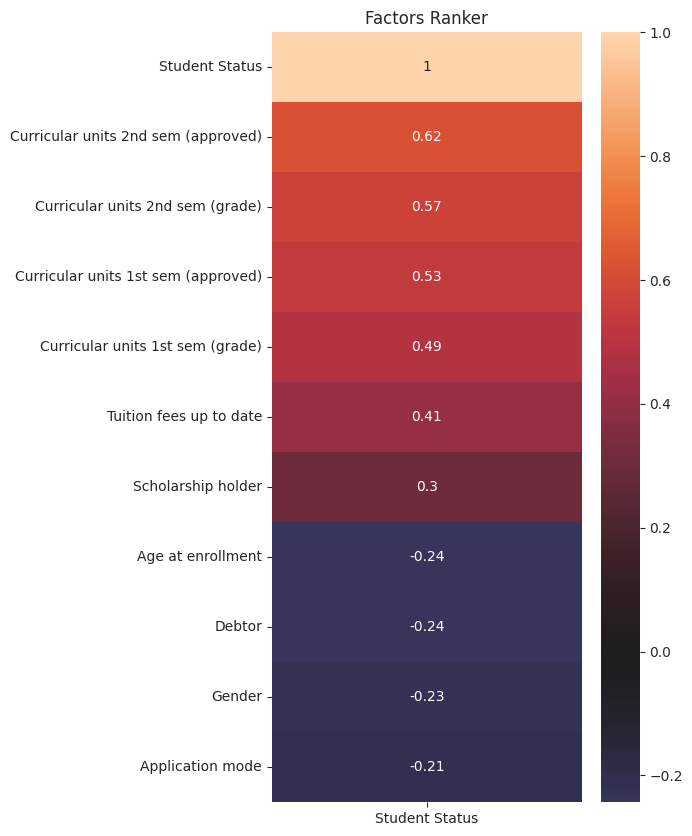

In [ ]:
# Creating a new DataFrame with only the top 10 features and 'Student Status'
top_10_df = d[top_10_features.to_list() + ['Student Status']].copy()

# Computing the correlation matrix for these features
top_10_corr = top_10_df.corr()[['Student Status']]

# Sorting by absolute value while keeping the sign to place negative values below positives
sorted_corr = top_10_corr.sort_values(by='Student Status', key=lambda x: abs(x), ascending=False)

# Plotting the heatmap with custom sorting
plt.figure(figsize=(5, 10))
sns.heatmap(sorted_corr, annot=True, center=0)
plt.title('Factors Ranker')
plt.show()

In [ ]:
# Creating interaction features for academic performance
d['Interaction_CU_1st_2nd_Approved'] = d['Curricular units 1st sem (approved)'] * d['Curricular units 2nd sem (approved)']
d['Interaction_CU_1st_2nd_Grade'] = d['Curricular units 1st sem (grade)'] * d['Curricular units 2nd sem (grade)']

# Creating aggregated features
d['Total_CU_Approved'] = d['Curricular units 1st sem (approved)'] + d['Curricular units 2nd sem (approved)']
d['Total_CU_Grade'] = (d['Curricular units 1st sem (grade)'] + d['Curricular units 2nd sem (grade)']) / 2

# Dropping the original features to reduce multi-collinearity
columns_to_drop = ['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)',
                   'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',]
d.drop(columns_to_drop, axis=1, inplace=True)

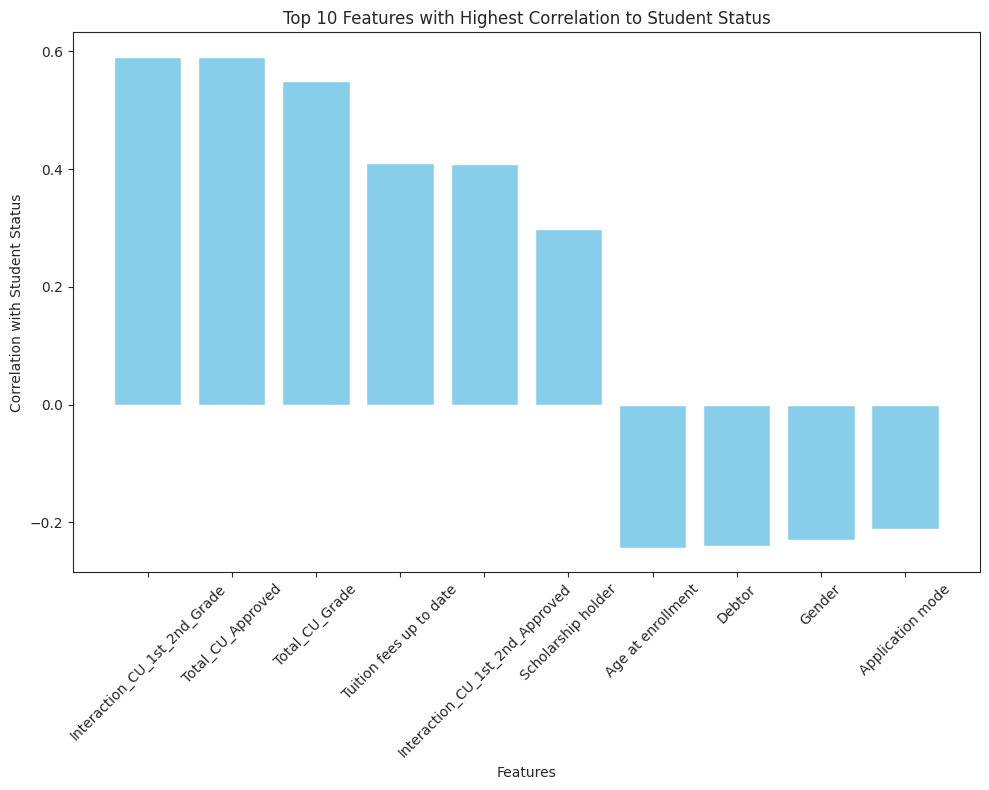

In [ ]:
# Recalculating correlations to ensure consistency
correlations = d.corr()['Student Status'].drop('Student Status')
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features].values

# Plotting the top 10 features
plt.figure(figsize=(10, 8))
plt.bar(x=top_10_features, height=top_10_corr_values, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with Student Status')
plt.title('Top 10 Features with Highest Correlation to Student Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

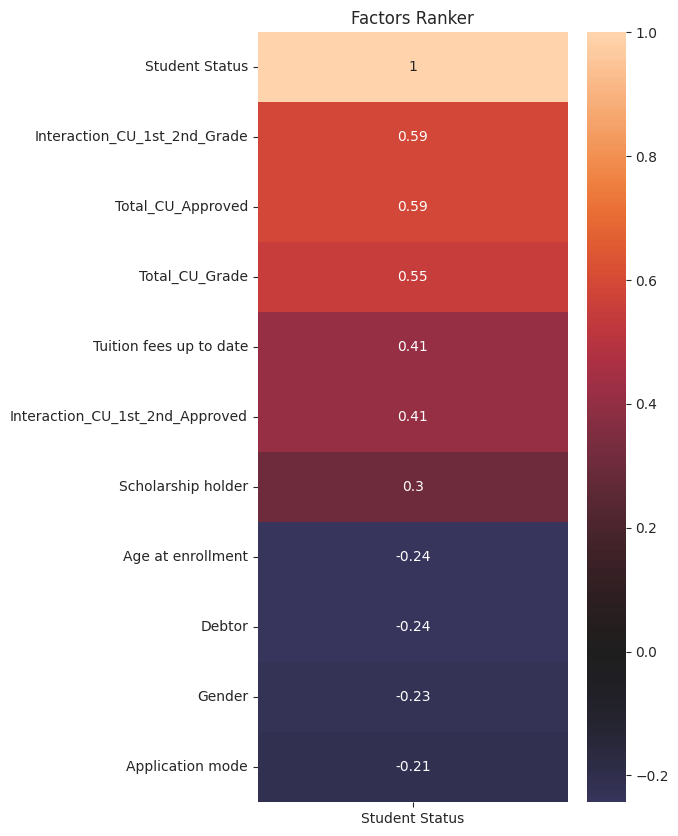

In [ ]:
# Creating a new DataFrame with only the top 10 features and 'Student Status'
top_10_df = d[top_10_features.to_list() + ['Student Status']].copy()

# Computing the correlation matrix for these features
top_10_corr = top_10_df.corr()[['Student Status']]

# Sorting by absolute value while keeping the sign to place negative values below positives
sorted_corr = top_10_corr.sort_values(by='Student Status', key=lambda x: abs(x), ascending=False)

# Plotting the heatmap with custom sorting
plt.figure(figsize=(5, 10))
sns.heatmap(sorted_corr, annot=True, center=0)
plt.title('Factors Ranker')
plt.show()

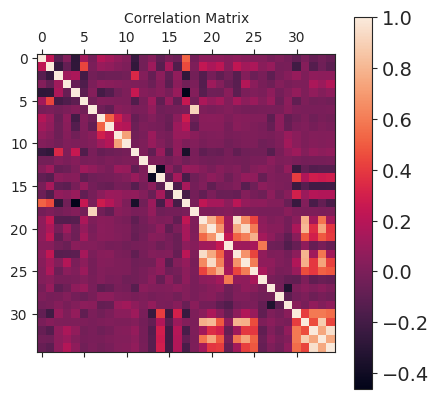

In [ ]:
#look for multi-colinearity among the features
matrix= d.corr()
plt.matshow(matrix)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=10);
plt.show()

columns with multi-colinearity:


*   nationality and international --> keep nationality. in second iteration, drop this variable entirely. low corerlation with student status
*   mother's qualification and father's qualification --> take the max? or change to new categorical variable. **one parent went to college or higher, two parents went to college or higher**
*   approved, grade, evaluations, enrolled columns highly correlate with one another --> keep one column: (enrolled - approved) to show how many classes were failed/dropped. Create interaction between first and second semester.
*   tuition_fees_up_to_date and debtor are negatively correlated --> either create an interaction term or keep tuition_fees_up_to_date. has higher correlation with student status
*   age at enrollment and daytime / evening attendance highly correlated --> possbily because night students are older and also working. Keep both at first and then maybe drop one in later iterations. Bin the age either way.


In [ ]:
df = df[df["Student Status"] != "Enrolled"]
df["Failed classes"] = (df['Curricular units 1st sem (approved)'] - df['Curricular units 1st sem (enrolled)']) * (df['Curricular units 2nd sem (approved)'] - df['Curricular units 2nd sem (enrolled)'])
df.groupby(["Student Status"]).count()

<ipython-input-38-a0b0abce882c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Failed classes"] = (df['Curricular units 1st sem (approved)'] - df['Curricular units 1st sem (enrolled)']) * (df['Curricular units 2nd sem (approved)'] - df['Curricular units 2nd sem (enrolled)'])


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Age at enrollment bins,Failed classes
Student Status,,,,,,,,,,,,,,,,,,,,,
Dropout,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,...,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421
Graduate,2209,2209,2209,2209,2209,2209,2209,2209,2209,2209,...,2209,2209,2209,2209,2209,2209,2209,2209,2206,2209


(array([2.469e+03, 4.110e+02, 2.760e+02, 2.230e+02, 1.110e+02, 7.300e+01,
        4.900e+01, 1.300e+01, 4.000e+00, 1.000e+00]),
 array([17. , 22.3, 27.6, 32.9, 38.2, 43.5, 48.8, 54.1, 59.4, 64.7, 70. ]),
 <BarContainer object of 10 artists>)

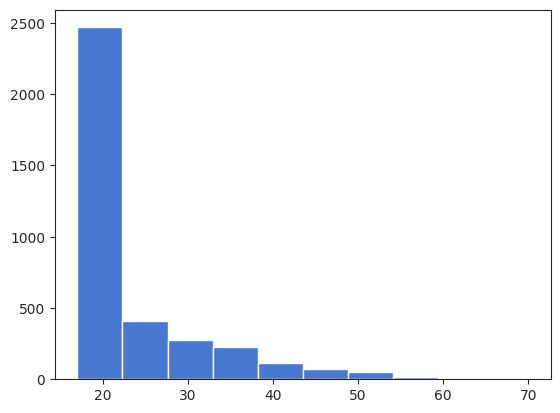

In [ ]:
#plot age histogram to determine age bins
#age bins: 0-18, 18-20, 20-22, 22-25, 25-35, 35 +)
plt.hist(df['Age at enrollment'])